In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import random





In [2]:
dataset = pd.read_csv("headbrain.csv")
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
#dividing the data into training and testing data
x = dataset["Head Size(cm^3)"].values
y = dataset["Brain Weight(grams)"].values
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y = (y - np.min(y)) / (np.max(y) - np.min(y))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.3,random_state = 2)
x_train = x_train.reshape(165,1)
y_train = y_train.reshape(165,1)
x_train  = np.c_[np.ones(len(x_train)),x_train]
x_test  = np.c_[np.ones(len(x_test)),x_test]

In [ ]:
plt.plot(x_train[:,1:], y_train, '*')
plt.show()

In [5]:
iter = 5000
theta = np.array([[0, 0]]).T  # shape (3, 1)
alpha = 0.1

n = len(x_train)
theta.shape


(2, 1)

In [6]:

for i in range(iter):
    Y_pred = x_train.dot(theta)
#     cost = (1 / (2 * n)) * np.transpose((x_train @ theta - y_train)) @ (x_train @ theta - y_train)
    theta = theta - (alpha / n) * (x_train.T.dot(x_train @ theta - y_train)) 
    Y_pred =  x_train.dot(theta)

# print(Y_pred)

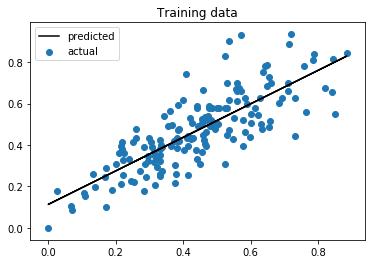

In [7]:
plt.plot(x_train[:,1:],Y_pred,label = "predicted",color = "black")
plt.scatter(x_train[:,1:],y_train,label = "actual")
plt.legend()
plt.title("Training data")
plt.show()

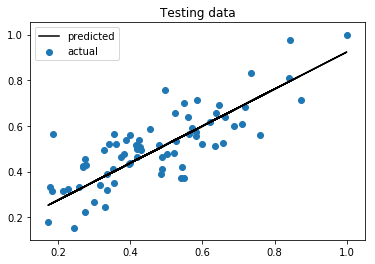

In [11]:
h_theta = x_test @ theta
plt.plot(x_test[:,1:],h_theta,label = "predicted",color = "black")
plt.scatter(x_test[:,1:],y_test,label = "actual")
plt.legend()
plt.title("Testing data")
plt.show()


In [12]:
# n = len(x_test)
# from sklearn import metrics
# rmse = np.sqrt(((y_test - h_theta) ** 2) / n)
# rss = ((y_test - h_theta) ** 2)
# tss = np.sum((y_test - np.mean(y_test)) ** 2)
# rs = 1 - (rss / tss)
# print("Testing Accuracy : \n","RSS :",rss,"\nRMSE: ",rmse)


In [13]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(h_theta,y_test)))

RMSE:  0.10021332259922555
